In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py

In [2]:
net_deeplab_030 = pd.read_csv('log/deeplab_df_030_001.csv')
net_fcdensenet_030 = pd.read_csv('log/fcdensenet_df_030_001.csv')
net_unet_030 = pd.read_csv('log/unet_df_030_001.csv')

net_unet_012 = pd.read_csv('log/unet_df_012_001.csv')
net_unet_031 = pd.read_csv('log/unet_df_030_011.csv')

# 512 x 512
net_fcdensenet_035 = pd.read_csv('log/fcdensenet_df_030_005.csv')
# age
net_fcdensenet_036 = pd.read_csv('log/fcdensenet_df_030_006.csv')

# error corrected
net_deeplab_030e = pd.read_csv('log/deeplab_df_adj_030_003.csv')
net_deeplab_030e_age = pd.read_csv('log/deeplab_df_adj_age_030_004.csv')

In [3]:
net_deeplab_030.columns

Index(['train_loss', ' train_acc_all', ' train_acc_mean', ' train_jacc',
       ' train_dice', ' val_loss', ' val_acc_all', ' val_acc_mean',
       ' val_jacc', ' val_dice', ' '],
      dtype='object')

In [4]:
net_deeplab_030['train_loss']

0     0.2643
1     0.2356
2     0.2297
3     0.2265
4     0.2216
5     0.2200
6     0.2129
7     0.2102
8     0.2134
9     0.2128
10    0.2052
11    0.2014
12    0.1997
13    0.1997
14    0.1994
15    0.1953
16    0.1930
17    0.1907
18    0.1899
19    0.1858
20    0.1842
21    0.1826
22    0.1817
23    0.1797
24    0.1751
25    0.1721
26    0.1716
27    0.1683
28    0.1668
29    0.1621
30    0.1630
31    0.1626
32    0.1611
33    0.1591
34    0.1588
35    0.1592
36    0.1545
37    0.1533
38    0.1520
39    0.1476
Name: train_loss, dtype: float64

In [5]:
def plot_mertics(data, title):
    # set plot size
    plt.figure(figsize=(10,8))
    plt.title(title)

    plt.plot(data['train_loss'], label='Train loss')
    plt.plot(data[' val_loss'], label='Valid loss')

    plt.plot(data[' train_acc_all'], label='Train acc')
    plt.plot(data[' val_acc_all'], label='Valid acc')

    plt.plot(data[' train_jacc'], label='Train IoU')
    plt.plot(data[' val_jacc'], label='Valid IoU')
    plt.legend()

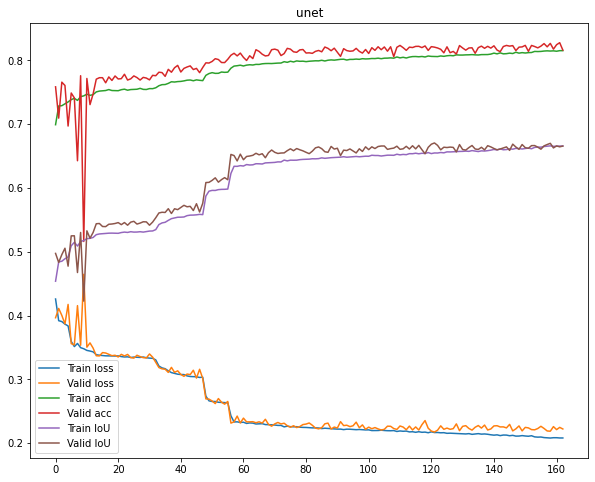

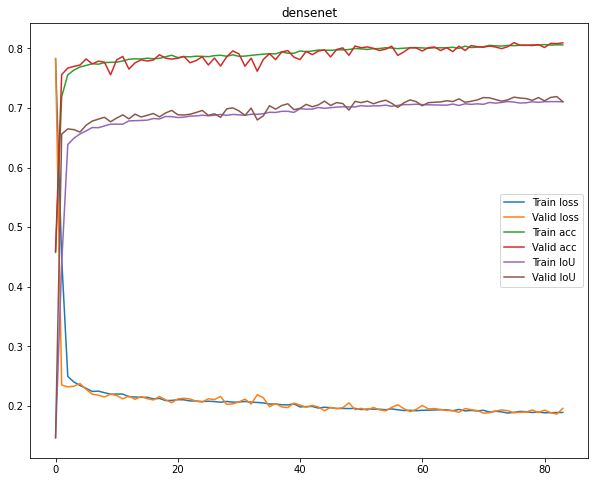

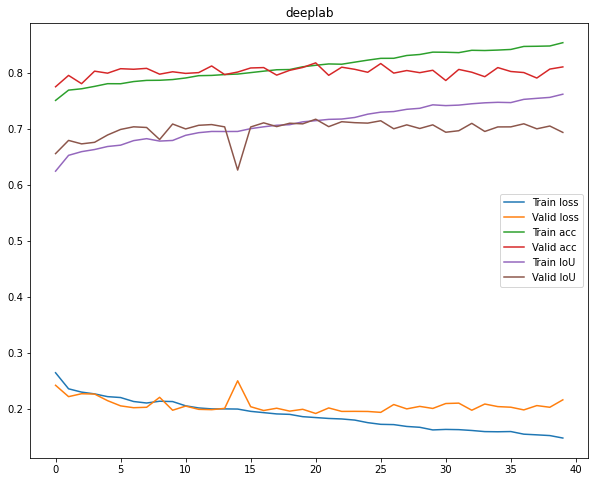

In [6]:
plot_mertics(net_unet_030, 'unet')
plot_mertics(net_fcdensenet_030, 'densenet')
plot_mertics(net_deeplab_030, 'deeplab')

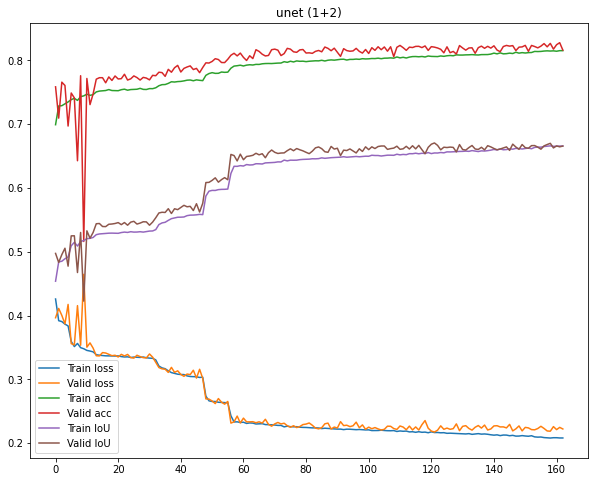

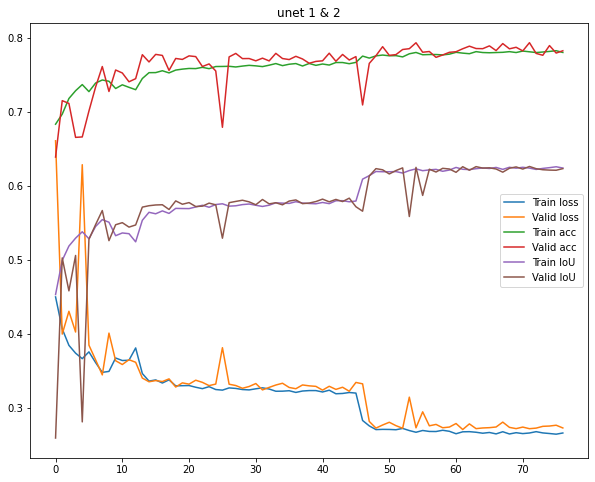

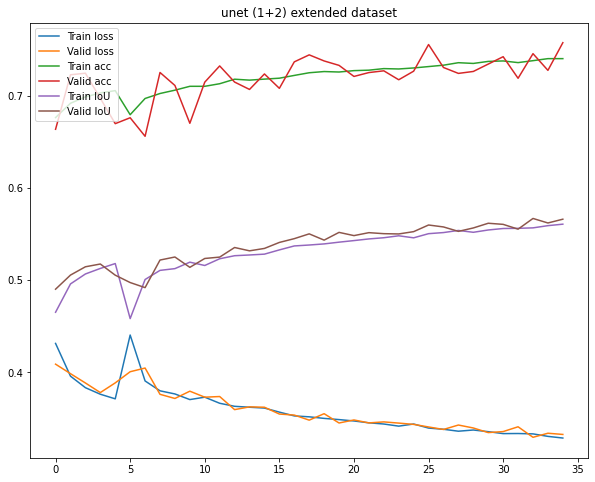

In [7]:
plot_mertics(net_unet_030, 'unet (1+2)')
plot_mertics(net_unet_031, 'unet 1 & 2')
plot_mertics(net_unet_012, 'unet (1+2) extended dataset')

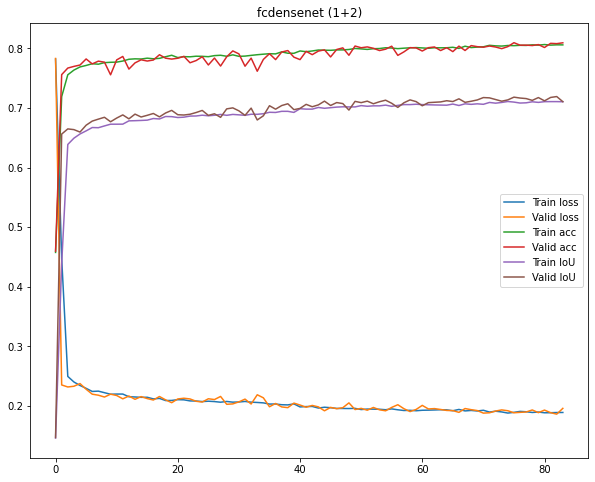

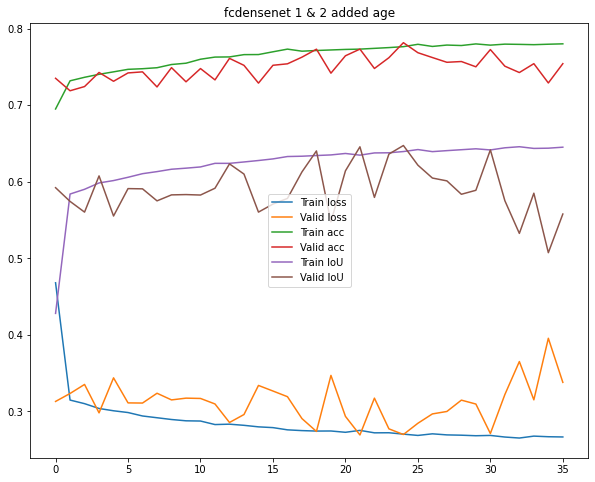

In [8]:
plot_mertics(net_fcdensenet_030, 'fcdensenet (1+2)')
plot_mertics(net_fcdensenet_036, 'fcdensenet 1 & 2 added age')

In [9]:
####################################
### error corrected ground truth ###
####################################

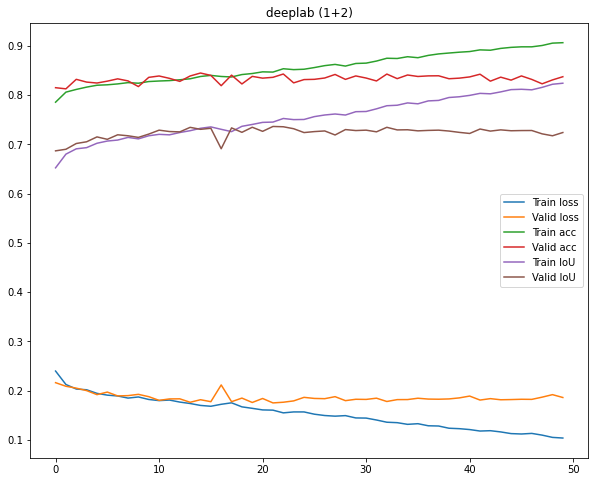

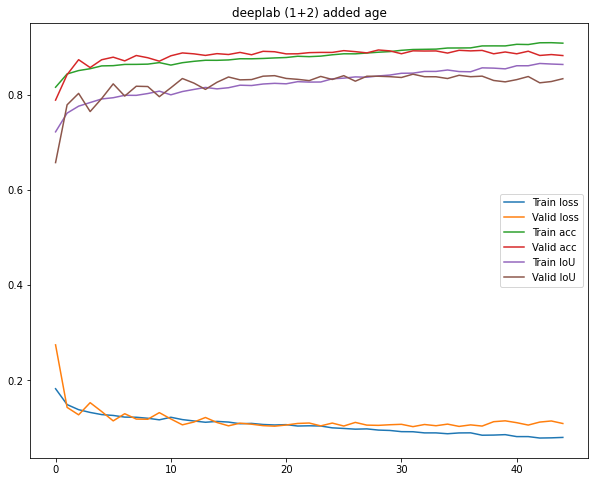

In [10]:
plot_mertics(net_deeplab_030e, 'deeplab (1+2)')
plot_mertics(net_deeplab_030e_age, 'deeplab (1+2) added age')

In [11]:
print('*' * 90)
print("Best model DeepLabv3 (input: ortho, dsm, dtm, slope)")
print('-' * 90)
print("Validation Loss: 0.1807  Acc all: 0.8413  Acc mean: 0.8374  IoU: 0.7350  Dice: 0.8377")
print('-' * 90)
print("Test Loss:       0.1793  Acc all: 0.8396  Acc mean: 0.8361  IoU: 0.7345  Dice: 0.8391")
print('*' * 90)

******************************************************************************************
Best model DeepLabv3 (input: ortho, dsm, dtm, slope)
------------------------------------------------------------------------------------------
Validation Loss: 0.1807  Acc all: 0.8413  Acc mean: 0.8374  IoU: 0.7350  Dice: 0.8377
------------------------------------------------------------------------------------------
Test Loss:       0.1793  Acc all: 0.8396  Acc mean: 0.8361  IoU: 0.7345  Dice: 0.8391
******************************************************************************************


In [12]:
print('*' * 90)
print("Best model DeepLabv3 (input: ortho, dsm, dtm, slope)")
print('-' * 90)
print("Validation Loss: 0.1002  Acc all: 0.8984  Acc mean: 0.9291  IoU: 0.8506  Dice: 0.9183")
print('-' * 90)
print("Test Loss:       0.0991  Acc all: 0.9009  Acc mean: 0.9282  IoU: 0.8527  Dice: 0.9194")
print('*' * 90)

******************************************************************************************
Best model DeepLabv3 (input: ortho, dsm, dtm, slope)
------------------------------------------------------------------------------------------
Validation Loss: 0.1002  Acc all: 0.8984  Acc mean: 0.9291  IoU: 0.8506  Dice: 0.9183
------------------------------------------------------------------------------------------
Test Loss:       0.0991  Acc all: 0.9009  Acc mean: 0.9282  IoU: 0.8527  Dice: 0.9194
******************************************************************************************


In [23]:
cm_val = np.array([[1.3560020e+05, 3.8314663e+01, 1.4600305e+02, 2.1664970e+01],
                   [7.2657845e+01, 1.0458356e+06, 3.6478188e+05, 9.3925156e+03],
                   [2.0117108e+02, 5.7579119e+05, 3.9278155e+06, 6.1420922e+04],
                   [4.9058044e+01, 1.2165683e+04, 1.1002349e+05, 3.1024441e+05]],
                  dtype=np.float32)

cm_test = np.array([[1.44757109e+05, 3.91547852e+01, 1.30906311e+02, 3.06008148e+01],
                   [7.18177185e+01, 1.06339962e+06, 3.72957250e+05, 1.09191699e+04],
                   [2.17387985e+02, 5.59015812e+05, 3.88414600e+06, 6.54300781e+04],
                   [5.27240334e+01, 1.20153770e+04, 1.28321945e+05, 3.12095312e+05]],
                  dtype=np.float32)

<AxesSubplot:>

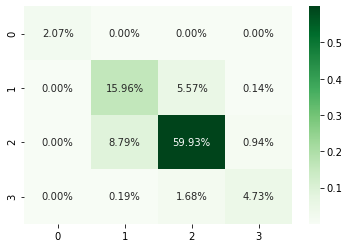

In [26]:
# confusion matrix on validation set
sns.heatmap(cm_val/np.sum(cm_val), annot=True, 
            fmt='.2%', cmap='Greens')

<AxesSubplot:>

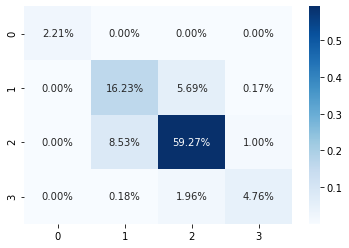

In [25]:
# confusion matrix on test set
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues')

In [28]:
cm_val = np.array([[1.3073742e+05, 5.2138493e+01, 2.1036151e+02, 3.4190426e+01],
                   [2.7876781e+01, 1.0993954e+06, 2.9424497e+05, 4.5549899e+02],
                   [9.7225052e+01, 4.4085441e+05, 4.1481268e+06, 2.7250277e+04],
                   [2.7647657e+01, 2.9819247e+02, 1.4976935e+04, 3.9681116e+05]],
                  dtype=np.float32)

cm_test = np.array([[1.3715270e+05, 6.0717922e+01, 2.7064664e+02, 3.4597759e+01],
                   [3.1288187e+01, 1.0785886e+06, 2.7578697e+05, 3.4997455e+02],
                   [9.5773933e+01, 4.3734328e+05, 4.1872720e+06, 2.0694123e+04],
                   [3.6379837e+01, 8.3032080e+02, 1.8343355e+04, 3.9670916e+05]],
                  dtype=np.float32)

<AxesSubplot:>

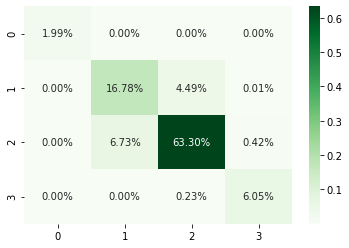

In [29]:
# confusion matrix on validation set
sns.heatmap(cm_val/np.sum(cm_val), annot=True, 
            fmt='.2%', cmap='Greens')

<AxesSubplot:>

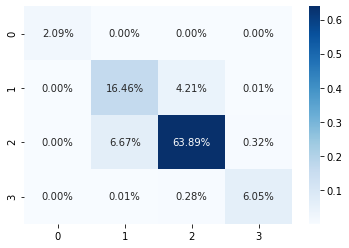

In [30]:
# confusion matrix on test set
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
###########################################################################################################

In [ ]:
"""
overall pixel accuracy (Acc all)):
    Computes the total pixel accuracy.
    The overall pixel accuracy provides an intuitive
    approximation for the qualitative perception of the
    label when it is viewed in its overall shape but not
    its details.
    
    correct / total
    

per class pixel accuracy (Acc mean):
    Computes the average per-class pixel accuracy.
    The per-class pixel accuracy is a more fine-grained
    version of the overall pixel accuracy. A model could
    score a relatively high overall pixel accuracy by
    correctly predicting the dominant labels or areas
    in the image whilst incorrectly predicting the
    possibly more important/rare labels. Such a model
    will score a low per-class pixel accuracy.
    
    mean( class_correct / class_total )
    
    
jaccard index (IoU):
    Jaccard index, a.k.a Intersection over Union (IoU).
    
    area of overlap / area of union
    mean( TP / (TP + FP + FN) )
    

dice coefficient (Dice):
    Sørensen–Dice coefficient, a.k.a the F1 score
    mean( 2TP / (2TP + FP + FN) )

"""

In [ ]:
###########################################   metrics - std   #############################################

In [55]:
metrics = {'acc_all':0.8902, 'acc_mean':0.8671, 'jacc':0.7808, 'dice':0.8704}

In [57]:
print('*' * 90)
print("Best model DeepLabv3+ (input: ortho, dsm, dtm, slope)")
print('-' * 90)
print("Test       Acc all: {}    Acc mean: {}    IoU: {}    Dice: {}".format(\
                    metrics['acc_all'], metrics['acc_mean'], metrics['jacc'], metrics['dice']))
print('*' * 90)

******************************************************************************************
Best model DeepLabv3+ (input: ortho, dsm, dtm, slope)
------------------------------------------------------------------------------------------
Test       Acc all: 0.8902    Acc mean: 0.8671    IoU: 0.7808    Dice: 0.8704
******************************************************************************************


In [62]:
cm_test = np.array([[2.2976e+07, 1.8870e+03, 1.0603e+04, 2.0100e+03],
                        [6.6280e+03, 4.8041e+07, 1.1672e+07, 3.6862e+05],
                        [2.0934e+04, 1.4831e+07, 1.6435e+08, 2.2346e+06],
                        [4.1950e+03, 4.3527e+05, 3.6594e+06, 1.1094e+07]], dtype=int)

<AxesSubplot:>

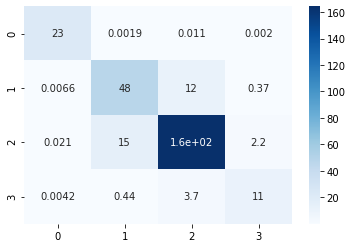

In [63]:
# confusion matrix on test set
sns.heatmap(cm_test/10**6, annot=True, cmap='Blues')

In [64]:
cm_test

array([[ 22976000,      1887,     10603,      2010],
       [     6628,  48041000,  11672000,    368620],
       [    20934,  14831000, 164350000,   2234600],
       [     4195,    435270,   3659400,  11094000]])

In [65]:
true_pos = np.diag(cm_test) 
precision = true_pos / np.sum(cm_test, axis=0)
recall = true_pos / np.sum(cm_test, axis=1)

In [66]:
print(precision)
print(recall)

[0.99861973 0.75883178 0.91462056 0.80982654]
[0.9993693  0.79950742 0.90582639 0.73021119]


In [67]:
F1 = 2 * (precision * recall) / (precision + recall)

In [68]:
F1

array([0.99899437, 0.77863874, 0.91020223, 0.76796092])

In [71]:
# Acc all
true_pos.sum()/cm_test.sum()

0.881136293824148

In [85]:
# Acc mean
np.mean(true_pos/cm_test.sum(axis=1))

0.8587285742844354

In [80]:
# IoU
false_neg = np.sum(cm_test, axis=0)-true_pos
false_pos = np.sum(cm_test, axis=1)-true_pos
np.mean(true_pos/(true_pos+false_pos+false_neg))

0.773508981421474

In [81]:
# Dice
np.mean(F1)

0.8639490677889582

In [100]:
cm_test_plus = np.zeros((3,4))
cm_test_plus[0,:] = precision
cm_test_plus[1,:] = recall
cm_test_plus[2,:] = F1

In [105]:
df_test = pd.DataFrame(cm_test/10**6, index=['void', 'thinning', 'no_thinning', 'other'], \
                       columns=['void', 'thinning', 'no_thinning', 'other'])
df_test.round(0).astype(int)

,void,thinning,no_thinning,other
void,23,0,0,0
thinning,0,48,12,0
no_thinning,0,15,164,2
other,0,0,4,11


In [106]:
df_test_plus = pd.DataFrame(cm_test_plus, index=['precision [%]', 'recall [%]', 'F1 [%]'], \
                       columns=['void', 'thinning', 'no_thinning', 'other'])
df_test_plus.round(2)

,void,thinning,no_thinning,other
precision [%],1.0,0.76,0.91,0.81
recall [%],1.0,0.80,0.91,0.73
F1 [%],1.0,0.78,0.91,0.77


In [8]:
def calc_mertics(cm_test, labels):
    true_pos = np.diag(cm_test) 
    precision = true_pos / np.sum(cm_test, axis=0)
    recall = true_pos / np.sum(cm_test, axis=1)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    cm_test_plus = np.zeros((4,cm_test.shape[0]))
    cm_test_plus[0,:] = precision
    cm_test_plus[1,:] = recall
    cm_test_plus[2,:] = F1

    # Acc all
    acc_all = true_pos.sum()/cm_test.sum()

    # Acc mean
    acc_mean = np.mean(true_pos/cm_test.sum(axis=1))

    # IoU
    false_neg = np.sum(cm_test, axis=0)-true_pos
    false_pos = np.sum(cm_test, axis=1)-true_pos
    iou = true_pos/(true_pos+false_pos+false_neg)
    miou = np.mean(true_pos/(true_pos+false_pos+false_neg))
    
    cm_test_plus[3,:] = iou

    # Dice
    dice = np.mean(F1)
    
    # create dataframes
    df_test = pd.DataFrame(cm_test/10**6, index=labels, columns=labels)
    df_test = df_test.round(0).astype(int)
    
    df_test_plus = pd.DataFrame(cm_test_plus, index=['precision [%]', 'recall [%]', 'F1 [%]', 'IoU [%]'], columns=labels)
    df_test_plus = df_test_plus.round(2)
    
    df_test_metrics = pd.DataFrame([[acc_all, acc_mean, miou, dice]], \
                       columns=['Acc all', 'Acc mean', 'IoU/Jacc', 'Dice/F1'])
    df_test_metrics = df_test_metrics.round(3)
    
    return df_test, df_test_plus, df_test_metrics

In [18]:
###########################################################################################################

In [112]:
x = cm_test[1:,1:]

In [113]:
true_pos = np.diag(x) 
precision = true_pos / np.sum(x, axis=0)
recall = true_pos / np.sum(x, axis=1)

# Acc all
print(true_pos.sum()/x.sum())

# Acc mean
print(np.mean(true_pos/x.sum(axis=1)))

# IoU
false_neg = np.sum(x, axis=0)-true_pos
false_pos = np.sum(x, axis=1)-true_pos
print(np.mean(true_pos/(true_pos+false_pos+false_neg)))

# Dice
print(np.mean(F1))

0.8706555705107125
0.8119797986492997
0.6988228214637101
0.8639490677889582


In [ ]:
###########################################   metrics   #############################################

In [ ]:
# std
metrics_std = {'loss': tensor(0.1391, device='cuda:0'),
 'acc_all': tensor(0.8899),
 'acc_mean': tensor(0.8693),
 'jacc': tensor(0.7827),
 'dice': tensor(0.8713)}
# ac12
metrics_ac12 = {'loss': tensor(0.3013, device='cuda:0'),
 'acc_all': tensor(0.8031),
 'acc_mean': tensor(0.7172),
 'jacc': tensor(0.6050),
 'dice': tensor(0.7090)}
# ac1
metrics_ac1 = {'loss': tensor(0.2752, device='cuda:0'),
 'acc_all': tensor(0.8473),
 'acc_mean': tensor(0.7186),
 'jacc': tensor(0.6073),
 'dice': tensor(0.7351)}

# std_mask
metrics_std_m = {'loss': tensor(0.3368, device='cuda:0'),
 'acc_all': tensor(0.9223),
 'acc_mean': tensor(0.6771),
 'jacc': tensor(0.6163),
 'dice': tensor(0.6735)}
# ac12_mask
metrics_ac12_m = {'loss': tensor(0.4398, device='cuda:0'),
 'acc_all': tensor(0.8617),
 'acc_mean': tensor(0.5729),
 'jacc': tensor(0.4901),
 'dice': tensor(0.5706)}
# ac1_mask
metrics_ac1_m = {'loss': tensor(0.4273, device='cuda:0'),
 'acc_all': tensor(0.8786),
 'acc_mean': tensor(0.5942),
 'jacc': tensor(0.5075),
 'dice': tensor(0.5830)}

In [6]:
# std
cm_std = np.array([[2.2976e+07, 1.8870e+03, 1.0603e+04, 2.0100e+03],
        [6.6280e+03, 4.8041e+07, 1.1672e+07, 3.6862e+05],
        [2.0934e+04, 1.4831e+07, 1.6435e+08, 2.2346e+06],
        [4.1950e+03, 4.3527e+05, 3.6594e+06, 1.1094e+07]], dtype=int)
# ac12
cm_ac12 = np.array([[2.2935e+07, 7.3540e+03, 3.3590e+03, 3.9000e+04, 5.5950e+03],
        [4.6920e+03, 1.4899e+07, 7.7343e+06, 4.3854e+06, 1.3462e+05],
        [3.2450e+03, 1.2534e+07, 1.4110e+07, 6.0319e+06, 2.5108e+05],
        [3.3147e+04, 8.1131e+06, 1.1203e+07, 1.5994e+08, 2.1505e+06],
        [5.1130e+03, 2.3736e+05, 1.9310e+05, 3.7178e+06, 1.1039e+07]], dtype=int)
# ac1
cm_ac1 = np.array([[2.2976e+07, 4.4868e+06, 8.2044e+06, 9.9666e+04],
        [1.2089e+04, 1.4844e+07, 1.2155e+07, 1.4689e+05],
        [7.6909e+04, 1.2636e+07, 1.8579e+08, 3.0897e+06],
        [1.2993e+04, 2.1822e+05, 3.6787e+06, 1.1283e+07]], dtype=int)

# std_mask
cm_std_m = np.array([[1.2096e+08, 2.3163e+04, 2.0639e+04, 0.0000e+00],
        [1.8078e+04, 4.8008e+07, 1.0111e+07, 0.0000e+00],
        [4.9899e+04, 1.4231e+07, 8.6284e+07, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]], dtype=int)
# ac12_mask
cm_ac12_m = np.array([[1.2091e+08, 6.0400e+03, 9.6900e+03, 7.5125e+04, 2.0780e+03],
        [3.0442e+04, 1.2611e+07, 8.4198e+06, 5.3588e+06, 2.5560e+03],
        [3.9037e+04, 8.4211e+06, 1.5100e+07, 8.1510e+06, 3.5920e+03],
        [9.3340e+04, 4.1107e+06, 6.3520e+06, 9.0003e+07, 6.2030e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]], dtype=int)
# ac1_mask
cm_ac1_m = np.array([[1.2096e+08, 4.5747e+06, 7.5014e+06, 3.8400e+02],
        [1.3637e+04, 1.4607e+07, 1.1802e+07, 3.2400e+02],
        [7.4518e+04, 1.2245e+07, 1.0793e+08, 2.1920e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]], dtype=int)

In [4]:
cm_base = np.array([[4.3380e+07, 8.8310e+03, 2.9789e+06, 1.8338e+05],
        [1.1556e+04, 9.1117e+07, 2.4611e+07, 6.4068e+05],
        [4.2785e+04, 2.5793e+07, 3.3573e+08, 3.2995e+06],
        [1.1446e+04, 8.6273e+05, 8.6690e+06, 2.2337e+07]], dtype=int)

In [9]:
cm, score, metric = calc_mertics(cm_base, ['void', 'thinning', 'no_thinning', 'other'])
cm

,void,thinning,no_thinning,other
void,43,0,3,0
thinning,0,91,25,1
no_thinning,0,26,336,3
other,0,1,9,22


In [10]:
score

,void,thinning,no_thinning,other
precision [%],1.00,0.77,0.90,0.84
recall [%],0.93,0.78,0.92,0.70
F1 [%],0.96,0.78,0.91,0.77
IoU [%],0.93,0.64,0.84,0.62


In [11]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.88,0.834,0.756,0.855


In [12]:
(0.64+0.84+0.62)/3

0.7000000000000001

In [13]:
(0.78+0.91+0.77)/3

0.82

In [27]:
###########################################   metrics - std  #############################################

cm, score, metric = calc_mertics(cm_std, ['void', 'thinning', 'no_thinning', 'other'])
cm

,void,thinning,no_thinning,other
void,23,0,0,0
thinning,0,48,12,0
no_thinning,0,15,164,2
other,0,0,4,11


In [28]:
score

,void,thinning,no_thinning,other
precision [%],1.0,0.76,0.91,0.81
recall [%],1.0,0.80,0.91,0.73
F1 [%],1.0,0.78,0.91,0.77


In [29]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.881,0.859,0.774,0.864


In [31]:
###########################################   metrics - ac12  #############################################

cm, score, metric = calc_mertics(cm_ac12, ['void', 'thinning1', 'thinning2', 'no_thinning', 'other'])
cm

,void,thinning1,thinning2,no_thinning,other
void,23,0,0,0,0
thinning1,0,15,8,4,0
thinning2,0,13,14,6,0
no_thinning,0,8,11,160,2
other,0,0,0,4,11


In [32]:
score

,void,thinning1,thinning2,no_thinning,other
precision [%],1.0,0.42,0.42,0.92,0.81
recall [%],1.0,0.55,0.43,0.88,0.73
F1 [%],1.0,0.47,0.43,0.90,0.77


In [33]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.797,0.717,0.603,0.713


In [35]:
###########################################   metrics - ac1  #############################################

cm, score, metric = calc_mertics(cm_ac1, ['void', 'thinning1', 'no_thinning', 'other'])
cm

,void,thinning1,no_thinning,other
void,23,4,8,0
thinning1,0,15,12,0
no_thinning,0,13,186,3
other,0,0,4,11


In [36]:
score

,void,thinning1,no_thinning,other
precision [%],1.00,0.46,0.89,0.77
recall [%],0.64,0.55,0.92,0.74
F1 [%],0.78,0.50,0.90,0.76


In [37]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.84,0.713,0.602,0.735


In [ ]:
##########################################################################################################
##############################################   masked   ################################################
##########################################################################################################

In [41]:
###########################################   metrics - std  #############################################

cm, score, metric = calc_mertics(cm_std_m[1:3,1:3], ['thinning', 'no_thinning'])
cm

,thinning,no_thinning
thinning,48,10
no_thinning,14,86


In [42]:
score

,thinning,no_thinning
precision [%],0.77,0.90
recall [%],0.83,0.86
F1 [%],0.80,0.88


In [43]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.847,0.842,0.722,0.837


In [45]:
###########################################   metrics - ac12  #############################################

cm, score, metric = calc_mertics(cm_ac12_m[1:4,1:4], ['thinning1', 'thinning2', 'no_thinning'])
cm

,thinning1,thinning2,no_thinning
thinning1,13,8,5
thinning2,8,15,8
no_thinning,4,6,90


In [46]:
score

,thinning1,thinning2,no_thinning
precision [%],0.50,0.51,0.87
recall [%],0.48,0.48,0.90
F1 [%],0.49,0.49,0.88


In [47]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.743,0.617,0.48,0.621


In [48]:
###########################################   metrics - ac12  #############################################

cm, score, metric = calc_mertics(cm_ac12_m[1:4,1:4], ['thinning1', 'thinning2', 'no_thinning'])
cm

,thinning1,thinning2,no_thinning
thinning1,13,8,5
thinning2,8,15,8
no_thinning,4,6,90


In [50]:
score

,thinning1,thinning2,no_thinning
precision [%],0.50,0.51,0.87
recall [%],0.48,0.48,0.90
F1 [%],0.49,0.49,0.88


In [51]:
metric

,Acc all,Acc mean,IoU/Jacc,Dice/F1
0,0.743,0.617,0.48,0.621


In [15]:
# confusion matrix
path_dataset = "/media/philipp/DATA/dataset/dataset_256_df_177.h5"
dset = h5py.File(path_dataset, 'r')
ground_truth = dset['ground_truth_2']

In [12]:
ground_truth

<HDF5 dataset "ground_truth_2": shape (40000, 256, 256, 1), type "|u1">

In [ ]:
torch.flatten(targets)

In [ ]:
stacked = torch.stack((torch.flatten(targets), \
                       torch.flatten(pred)), dim=1)

In [ ]:
cmt = torch.zeros(5,5, dtype=torch.int64)

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
######################################################################################

In [4]:
import os

In [2]:
pwd

'/home/philipp/Code/python/edin_results'

In [7]:
directories = os.listdir('/home/philipp/Code/work/log_deeplab/')

In [8]:
for f in directories:
    

['deeplab_df_std_01_resnet_dc_512_4.txt',
 'deeplab_df_ac12_01_res_dc_512.csv',
 'deeplab_df_std_f02.csv',
 'deeplab_df_ac1_01_res_dc_512.txt',
 'deeplab_df_std_01_ab_ortho_ifr.txt',
 'deeplab_df_std_01_resnet_dc_512_4.csv',
 'deeplab_df_std_01_resnet_cr32.csv',
 'deeplab_df_std_01_resnet_dc_1024.txt',
 'deeplab_df_std_01_ab_ortho.csv',
 'deeplab_df_std_01_ab_ortho_0.txt',
 'deeplab_df_std_xcep_dc_512.txt',
 'deeplab_df_std_xcep_dc_512',
 'deeplab_df_std_01.csv',
 'deeplab_df_std_01_resnet_dc_1024.csv',
 'deeplab_df_std_01_resnet_cr64.csv',
 'deeplab_df_std_01_resnet_cr64.txt',
 'deeplab_df_std_01_ab_ortho_0.csv',
 'deeplab_df_std_01_ab_ortho.txt',
 'deeplab_df_std_01_resnet_cr32.txt',
 'deeplab_df_std_01_resnet_dc_512.txt',
 'deeplab_df_ac1_01.txt',
 'deeplab_df_std_01_res_dc_512_os8.csv',
 'deeplab_df_std_01.txt',
 'deeplab_df_std_01_xcep_dc_512.csv',
 'deeplab_df_std_01_resnet_dc_512.csv',
 'deeplab_df_std_01_ab_dsm.txt',
 'deeplab_df_std_01_ab_dtm.txt',
 'deeplab_df_std_01_ab_ortho

In [ ]:
net_deeplab_030 = pd.read_csv('log/deeplab_df_030_001.csv')